In [1]:
# Dependencies and Setup
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib import dates as mpl_dates
from matplotlib.pyplot import figure
from scipy.stats import linregress
df_ny = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
df_ny_death = pd.read_csv ("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")


# Which States Implentment Stay at Home Order Better?

# New York COVID-19 Infection Data

In [2]:
df_ny.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,133,133,133,135,135,136,136,136,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,13,13,13,14,14,14,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,897,903,923,974,1043,1068,1118,1213,1252,1298
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,51,51,51,51,51,51,53,53,53,53


In [3]:
newyork_df = df_ny.loc[df_ny['Province_State'] == 'New York']
newyork_df = newyork_df.drop(['Admin2','Province_State','Country_Region','UID',
                              'iso2','iso3','code3','FIPS','Lat','Long_','4/19/20','4/20/20','4/21/20'], axis = 1)
newyork_df = newyork_df.set_index('Combined_Key')
newyork_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Albany, New York, US",0,0,0,0,0,0,0,0,0,0,...,379,426,446,478,499,535,548,581,619,648
"Allegany, New York, US",0,0,0,0,0,0,0,0,0,0,...,22,26,26,26,26,28,28,28,29,30
"Bronx, New York, US",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Broome, New York, US",0,0,0,0,0,0,0,0,0,0,...,105,112,117,126,133,146,153,167,178,186
"Cattaraugus, New York, US",0,0,0,0,0,0,0,0,0,0,...,17,18,19,28,28,32,32,32,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westchester, New York, US",0,0,0,0,0,0,0,0,0,0,...,17004,18077,18729,19313,19786,20191,20947,21828,22476,23179
"Wyoming, New York, US",0,0,0,0,0,0,0,0,0,0,...,29,30,31,31,31,32,42,42,44,44
"Yates, New York, US",0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,4,6,6,7,8,9


In [4]:
# Check for any null value in dataframe 
ny_null_data = newyork_df[newyork_df.isnull().any(axis=1)]
ny_null_data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,


In [5]:
# Find the first date of infection, which is when sum(infection number) > 0 
#3/2/20 is the first confirmed case in New York 
newyork_df_sum = newyork_df.sum(axis = 0)
newyork_df_sum = newyork_df_sum.to_frame()
newyork_df_sum = newyork_df_sum.reset_index()
#newyork_df_sum = newyork_df_sum.(columns={'Index':'Date','':'Infection number'})
newyork_df_sum.head(45)
#newyork_df_sum.plot(kind= "line", x='index')

,index,0
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
5,1/27/20,0
6,1/28/20,0
7,1/29/20,0
8,1/30/20,0
9,1/31/20,0


In [6]:
newyork_df_sum.columns = ['Date', 'Infection number']

In [7]:
newyork_df_sum

,Date,Infection number
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
83,4/14/20,203020
84,4/15/20,214454
85,4/16/20,223691
86,4/17/20,230597


In [8]:
x_list = ['Shelter in place' , 'No shelter in place']
y_list = [241712 , 2022400]

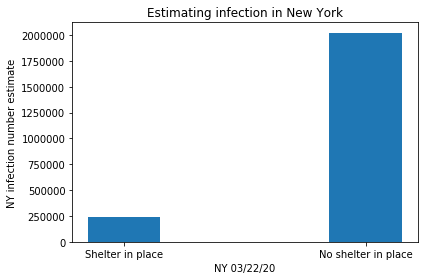

In [9]:
plt.bar(x = x_list, height = y_list, width = 0.3)
plt.xlabel("NY 03/22/20")
plt.ylabel("NY infection number estimate")
plt.title("Estimating infection in New York")
plt.tight_layout()
plt.savefig("NY_estimate_infection.png")

In [10]:
import mpld3, pandas as pd
# mpld3.enable_notebook()
ax = newyork_df_sum.plot(kind= "line", x='Date',y='Infection number', grid=True,
                    marker = '*', figsize = (30,20))
plt.ylabel("Number of Infection")
plt.xlabel("Date from 1/22/20 - 4/18/20")
plt.savefig("0122_0402_Infection.png")

# labels = list(newyork_df_sum.columns.values)
# for i in range(len(labels)):
#     tooltip = mpld3.plugins.LineLabelTooltip(ax.get_lines()[i], labels[i])
#     mpld3.plugins.connect(plt.gcf(), tooltip)
# plt.show()

ModuleNotFoundError: No module named 'mpld3'

In [ ]:
#Orginztion and pick out the important date 
newyork_key_date_df= newyork_df[['3/1/20','3/2/20','3/21/20','3/22/20','3/23/20','4/5/20','4/18/20']]
newyork_key_date_df

In [ ]:
infection_rate_shelter = newyork_key_date_df['4/18/20'] - newyork_key_date_df['3/22/20']
newyork_key_date_df['Infection number after shelter at home'] = infection_rate_shelter
newyork_key_date_df

In [ ]:
#Calculating infection number after shelter at home 
infection_number_shelter = newyork_key_date_df['Infection number after shelter at home'].sum()
infection_shelter_start = newyork_key_date_df['3/22/20'].sum()
infection_to_date = newyork_key_date_df['4/18/20'].sum()
infection_14_day_period = newyork_key_date_df['4/5/20'].sum() - newyork_key_date_df['3/22/20'].sum()
infection_after_14_day = newyork_key_date_df['4/18/20'].sum() - newyork_key_date_df['4/5/20'].sum()


print(f"Total infection to 03/22/20: {infection_shelter_start} people")
print(f"Total infection to 04/18/20: {infection_to_date} people")
print(f"There are {infection_number_shelter} infection after shelter at home was ordered")
print(f"Infection between 03/22/20 to 04/02/20: {infection_14_day_period}")
print(f"Infection between 04/05/20 to 04/18/20: {infection_after_14_day}")


In [ ]:
ny_top20_infection_df = newyork_key_date_df.head(20)
ny_top20_infection_df

In [ ]:
#ny_infection = ny_top20_infection_df['4/18/20']
#ny_county = ny_top20_infection_df['Combined_Key']
#ny_top20_infection_df.plot.pie(y = '4/18/20')

In [ ]:
x_infection_date_ca = [datetime.date(2020,1,22),datetime.date(2020,1,26),
     datetime.date(2020,3,19),datetime.date(2020,4,2),datetime.date(2020,4,18)]
y_infection_number_ca = [0,2,1005,9768,19718]

plt.plot_date(x_infection_date_ca,y_infection_number_ca, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.style.use('seaborn')
#print(plt.style.available)
#plt.plot(x_infeciton_date,y_infection_number, marker = "o", linestyle = 'dashed')
plt.xlabel("Date")
plt.ylabel("Infection number")
plt.yticks(np.arange(0,25000,1000))
#plt.legend()
plt.style.use('seaborn')
plt.show()


In [ ]:
x_infection_date_nyc = [datetime.date(2020,1,22),datetime.date(2020,3,2),datetime.date(2020,3,22),datetime.date(2020,4,5),datetime.date(2020,4,18)]
y_infection_number_nyc = [0,1,15800,123160,241712]
plt.plot_date(x_infection_date_nyc,y_infection_number_nyc, linestyle='dashed')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel("Date")
plt.ylabel("Infection number")
plt.yticks(np.arange(0,250000,10000))
plt.tight_layout()
plt.style.use('seaborn')
plt.savefig("NY_key_date_infection.png")
plt.show()

In [ ]:
newyork_df_sum['Date'] = pd.to_datetime(newyork_df_sum.Date)
new

In [ ]:
infection_322 = newyork_df_sum.iloc[60:75,:]
infection_322

In [ ]:
infection_322 = infection_322.reset_index()
x_322_value = infection_322['index']
y_322_value = infection_322['Infection number']
plt.scatter(infection_322['Date'],y_322_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_322_value, y_322_value)
regress_values = x_322_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f" Slope for 03/22 - 04/5 = {slope}")
plt.xlabel('First 14 days after shut down')
plt.ylabel('Number of Infection ')
plt.show()

In [ ]:
plt.scatter(x_322_value,y_322_value)
plt.plot(x_322_value,regress_values,"r-")
plt.annotate(line_eq,(60,100000),fontsize=15,color="red")
plt.xlabel('First 14 days after shut down 03/22 - 04/05')
plt.ylabel('NY Number of Infection ')
print(line_eq)
print(f"Slope for 03/22 - 04/5 = {slope}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("NY_0322_0405_Infection.png")
plt.show()

In [ ]:
infection_405 = newyork_df_sum.iloc[74:,:]
infection_405

In [ ]:
infection_405 = infection_405.reset_index()
x_405_value = infection_405['index']
y_405_value = infection_405['Infection number']
plt.scatter(infection_405['Date'],y_405_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_405_value, y_405_value)
regress_values = x_405_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Slope for 04/05 - 04/18 = {slope}")
plt.show()

In [ ]:
plt.scatter(x_405_value,y_405_value)
plt.plot(x_405_value,regress_values,"r-")
plt.annotate(line_eq,(75,225000),fontsize=15,color="red")
plt.xlabel('04/05/20 - 04/18/20')
plt.ylabel('NY Number of Infection')
print(line_eq)
print(f"Slope for 04/05 - 04/18 = {slope}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("NY_0405_0418_Infection.png")
plt.show()

# New York COVID-19 Death Data

In [12]:
df_ny_death

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,44,45,45,51,56,58,60,62,63,64
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,2,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,84070008,US,USA,840,NaN,Marine Corps,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3265,84070009,US,USA,840,NaN,Navy,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
3266,84070013,US,USA,840,NaN,Staff,Federal Bureau of Prisons,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3267,84070010,US,USA,840,NaN,Unassigned,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12


In [13]:
newyork_death_df = df_ny_death.loc[df_ny_death['Province_State'] == 'New York']
newyork_death_df = newyork_death_df.drop(['Admin2','Province_State','Country_Region','UID','iso2','iso3','code3','FIPS','Lat','Long_','4/19/20','4/20/20','4/21/20'],axis = 1)
newyork_death_df = newyork_death_df.set_index('Combined_Key')
newyork_death_df

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Albany, New York, US",305506,0,0,0,0,0,0,0,0,0,...,11,11,12,12,14,16,20,20,20,20
"Allegany, New York, US",46091,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
"Bronx, New York, US",1418207,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Broome, New York, US",190488,0,0,0,0,0,0,0,0,0,...,6,6,6,6,8,8,8,8,8,9
"Cattaraugus, New York, US",76117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westchester, New York, US",967506,0,0,0,0,0,0,0,0,0,...,359,389,461,511,557,596,640,668,668,668
"Wyoming, New York, US",39859,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,3,3,3,3
"Yates, New York, US",24913,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Check for any null value in dataframe 
ny_death_null_data = newyork_death_df[newyork_death_df.isnull().any(axis=1)]
ny_death_null_data

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,


In [15]:
#Find the first date of infection, which is when sum(infection number) > 0 
#3/14/20 is the first confirmed death in New York 
newyork_death_df_sum= newyork_death_df.sum(axis = 0)
newyork_death_df_sum[newyork_death_df_sum > 0]

Population    23628065
3/14/20              2
3/15/20              2
3/16/20             10
3/17/20             13
3/18/20             17
3/19/20             38
3/20/20             46
3/21/20             60
3/22/20            117
3/23/20            158
3/24/20            210
3/25/20            285
3/26/20            385
3/27/20            527
3/28/20            883
3/29/20           1063
3/30/20           1342
3/31/20           1714
4/1/20            2176
4/2/20            2738
4/3/20            3262
4/4/20            3544
4/5/20            4029
4/6/20            4698
4/7/20            5489
4/8/20            6268
4/9/20            7067
4/10/20           7867
4/11/20           8627
4/12/20           9385
4/13/20          10058
4/14/20          10842
4/15/20          11617
4/16/20          14832
4/17/20          17131
4/18/20          17671
dtype: int64

In [16]:
newyork_death_df_sum.to_frame()

,0
Population,23628065
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
...,...
4/14/20,10842
4/15/20,11617
4/16/20,14832
4/17/20,17131


In [17]:
newyork_death_df_sum = newyork_death_df_sum.reset_index()
newyork_death_df_sum.columns = ['Date','Deaths']
newyork_death_df_sum

,Date,Deaths
0,Population,23628065
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
84,4/14/20,10842
85,4/15/20,11617
86,4/16/20,14832
87,4/17/20,17131


In [18]:
death_319_418 = newyork_death_df_sum.iloc[61:,:]
death_319_418 = death_319_418.reset_index()
death_319_418

,index,Date,Deaths
0,61,3/22/20,117
1,62,3/23/20,158
2,63,3/24/20,210
3,64,3/25/20,285
4,65,3/26/20,385
5,66,3/27/20,527
6,67,3/28/20,883
7,68,3/29/20,1063
8,69,3/30/20,1342
9,70,3/31/20,1714


<BarContainer object of 28 artists>

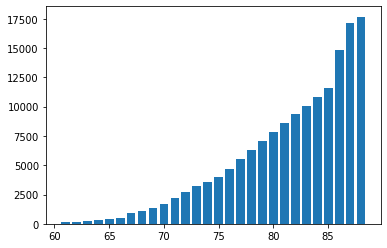

In [19]:
plt.bar(x = death_319_418['index'], height = death_319_418['Deaths'])

In [20]:

death_322 = newyork_death_df_sum.iloc[61:76,:]

In [21]:
death_322

,Date,Deaths
61,3/22/20,117
62,3/23/20,158
63,3/24/20,210
64,3/25/20,285
65,3/26/20,385
66,3/27/20,527
67,3/28/20,883
68,3/29/20,1063
69,3/30/20,1342
70,3/31/20,1714


y = 289.21x + -18170.55
Slope for 03/22 - 04/5 = 289.2071428571429


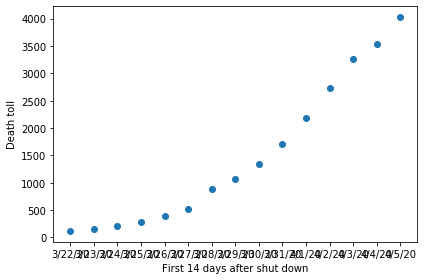

In [22]:

death_322 = death_322.reset_index()
x_322_values = death_322['index']
y_322_values = death_322['Deaths']
plt.scatter(death_322['Date'],y_322_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_322_values, y_322_values)
regress_values = x_322_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('First 14 days after shut down')
plt.ylabel('Death toll')
print(line_eq)
print(f"Slope for 03/22 - 04/5 = {slope}")

plt.tight_layout()
plt.show()

The r-squared is: 0.9236937477628486


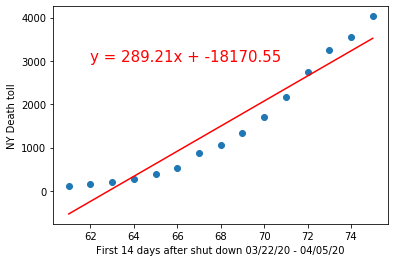

In [23]:
plt.scatter(x_322_values,y_322_values)
plt.plot(x_322_values,regress_values,"r-")
plt.annotate(line_eq,(62,3000),fontsize=15,color="red")
plt.xlabel('First 14 days after shut down 03/22/20 - 04/05/20')
plt.ylabel('NY Death toll')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("NY_0319_0402_Death.png")
plt.show()

In [24]:
death_405 = newyork_death_df_sum.iloc[76:,:]

In [25]:
death_405['1/2'] = death_405['Deaths'] / 2 
death_405

C:\Users\ericw\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Deaths,1/2
76,4/6/20,4698,2349.0
77,4/7/20,5489,2744.5
78,4/8/20,6268,3134.0
79,4/9/20,7067,3533.5
80,4/10/20,7867,3933.5
81,4/11/20,8627,4313.5
82,4/12/20,9385,4692.5
83,4/13/20,10058,5029.0
84,4/14/20,10842,5421.0
85,4/15/20,11617,5808.5


y = 1051.29x + -76086.49
Slope for 04/05 - 04/18 = 1051.2912087912089


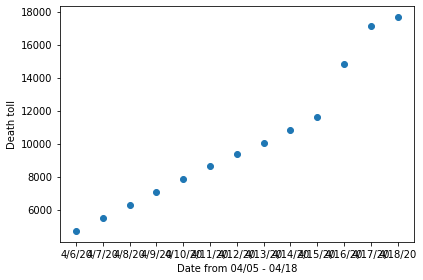

In [26]:
death_405 = death_405.reset_index()
x_405_values = death_405['index']
y_405_values = death_405['Deaths']
plt.scatter(death_405['Date'],y_405_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_405_values, y_405_values)
regress_values = x_405_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Date from 04/05 - 04/18')
plt.ylabel('Death toll')
print(line_eq)
print(f"Slope for 04/05 - 04/18 = {slope}")

plt.tight_layout()
plt.show()

The r-squared is: 0.9399958254953356


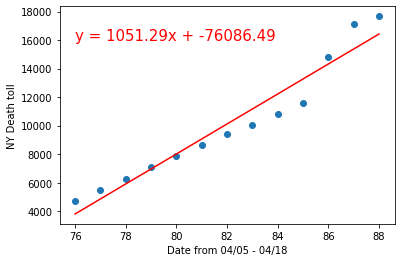

In [27]:
plt.scatter(x_405_values,y_405_values)
plt.plot(x_405_values,regress_values,"r-")
plt.annotate(line_eq,(76,16000),fontsize=15,color="red")
plt.xlabel('Date from 04/05 - 04/18')
plt.ylabel('NY Death toll')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("NY_0405_0418_Death.png")
plt.show()

y = 525.65x + -38043.25
Slope for 04/05 - 04/18 = 525.6456043956044


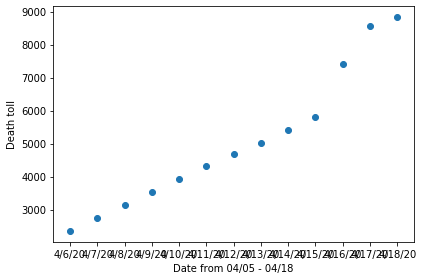

In [28]:
x_405_values = death_405['index']
y_4055_values = death_405['1/2']
plt.scatter(death_405['Date'],y_4055_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_405_values, y_4055_values)
regress_values = x_405_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Date from 04/05 - 04/18')
plt.ylabel('Death toll')
print(line_eq)
print(f"Slope for 04/05 - 04/18 = {slope}")

plt.tight_layout()
plt.show()

In [29]:
ny_death_key_date_df= newyork_death_df[['Population','3/13/20','3/14/20','3/21/20','3/22/20','3/23/20','4/5/20','4/18/20']]
ny_death_key_date_df

,Population,3/13/20,3/14/20,3/21/20,3/22/20,3/23/20,4/5/20,4/18/20
Combined_Key,,,,,,,,
"Albany, New York, US",305506,0,0,0,0,0,8,20
"Allegany, New York, US",46091,0,0,0,0,0,1,1
"Bronx, New York, US",1418207,0,0,0,0,0,0,0
"Broome, New York, US",190488,0,0,0,1,1,5,9
"Cattaraugus, New York, US",76117,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
"Westchester, New York, US",967506,0,0,0,0,0,67,668
"Wyoming, New York, US",39859,0,0,0,0,1,1,3
"Yates, New York, US",24913,0,0,0,0,0,0,0


In [32]:
ny_death_rate_shelter = ny_death_key_date_df['4/18/20'] - ny_death_key_date_df['3/22/20']
ny_death_key_date_df['Deaths after shelter at home'] = ny_death_rate_shelter
ny_death_key_date_df.sort_values(by = ['Population'], ascending = False)

C:\Users\ericw\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Population,3/13/20,3/14/20,3/21/20,3/22/20,3/23/20,4/5/20,4/18/20,Deaths after shelter at home
Combined_Key,,,,,,,,,
"New York City, New York, US",5803210,0,1,45,63,99,3048,13202,13139
"Kings, New York, US",2559903,0,0,0,0,0,0,0,0
"Queens, New York, US",2253858,0,0,0,0,0,0,0,0
"Suffolk, New York, US",1476601,0,0,9,9,13,175,693,684
"Bronx, New York, US",1418207,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
"Yates, New York, US",24913,0,0,0,0,0,0,0,0
"Schuyler, New York, US",17807,0,0,0,0,0,0,0,0
"Hamilton, New York, US",4416,0,0,0,0,0,0,0,0


In [33]:
#Calculating deaths number after shelter at home 
ny_death_number_shelter = ny_death_key_date_df['Deaths after shelter at home'].sum()
ny_death_shelter_start = ny_death_key_date_df['3/21/20'].sum()
ny_death_to_date = ny_death_key_date_df['4/18/20'].sum()

print(f"Total deaths to 03/21/20: {ny_death_shelter_start} people")
print(f"Total deaths to 04/18/20: {ny_death_to_date} people")
print(f"There are {ny_death_number_shelter} deaths after shelter at home was ordered")

Total deaths to 03/21/20: 60 people
Total deaths to 04/18/20: 17671 people
There are 17554 deaths after shelter at home was ordered
